## Import Library

In [21]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\IRMAYA
[nltk_data]     SALSABILA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Dataset

In [22]:
train_df = pd.read_csv('dataset.csv')
train_df

,ID,Kategori Umum,Kategori Khusus,Penyelenggara,Posisi,Deskripsi,Durasi,Tanggal Pendaftaran,Link,CP,Jenis Kontak,Lokasi
0,1,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Surabaya
1,2,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Semarang
2,3,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Jakarta Selatan
3,4,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Bandung
4,5,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Samarinda
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Kegiatan Umum,Magang,Schoters,Graphic Designer,Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628544989332,Whatsapp,Jakarta Selatan
496,497,Kegiatan Umum,Magang,Schoters,Marketing Strategy Officer,Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628806899118,Whatsapp,Jakarta Selatan
497,498,Kegiatan Umum,Magang,Schoters,Social Media Content Creator (For Schoters),Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628236379679,Whatsapp,Jakarta Selatan
498,499,Kegiatan Umum,Magang,Schoters,KOL Specialist,Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628844895059,Whatsapp,Jakarta Selatan


In [23]:
train_df.shape

(500, 12)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   500 non-null    int64 
 1   Kategori Umum        500 non-null    object
 2   Kategori Khusus      500 non-null    object
 3   Penyelenggara        500 non-null    object
 4   Posisi               500 non-null    object
 5   Deskripsi            500 non-null    object
 6   Durasi               500 non-null    object
 7   Tanggal Pendaftaran  500 non-null    object
 8   Link                 500 non-null    object
 9   CP                   500 non-null    object
 10  Jenis Kontak         500 non-null    object
 11  Lokasi               500 non-null    object
dtypes: int64(1), object(11)
memory usage: 47.0+ KB


In [25]:
train_df.isnull().sum()

ID                     0
Kategori Umum          0
Kategori Khusus        0
Penyelenggara          0
Posisi                 0
Deskripsi              0
Durasi                 0
Tanggal Pendaftaran    0
Link                   0
CP                     0
Jenis Kontak           0
Lokasi                 0
dtype: int64

In [27]:
# Function to remove emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"
                                  u"\U000024C2-\U0001F251"
                                  "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text).replace('\n\n', ' ')

# Apply the function to the DataFrame
train_df['Deskripsi'] = train_df['Deskripsi'].apply(remove_emoticons)
train_df

,ID,Kategori Umum,Kategori Khusus,Penyelenggara,Posisi,Deskripsi,Durasi,Tanggal Pendaftaran,Link,CP,Jenis Kontak,Lokasi
0,1,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Surabaya
1,2,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Semarang
2,3,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Jakarta Selatan
3,4,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Bandung
4,5,Kegiatan Umum,Organisasi Luar Kampus,AIESEC,Staff,"AIESEC, organisasi kepemimpinan pemuda global,...",1 Tahun,10-26 Agustus 2024,https://aiesec.or.id/join-aiesec/,‪6281333553871‬,Whatsapp,Samarinda
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Kegiatan Umum,Magang,Schoters,Graphic Designer,Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628544989332,Whatsapp,Jakarta Selatan
496,497,Kegiatan Umum,Magang,Schoters,Marketing Strategy Officer,Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628806899118,Whatsapp,Jakarta Selatan
497,498,Kegiatan Umum,Magang,Schoters,Social Media Content Creator (For Schoters),Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628236379679,Whatsapp,Jakarta Selatan
498,499,Kegiatan Umum,Magang,Schoters,KOL Specialist,Transformasi Start-Up Edutech Melalui Riset Da...,5 bulan (06 Agu - 20 Des 2024),26 April - 10 Juni,https://kampusmerdeka.kemdikbud.go.id/program/...,628844895059,Whatsapp,Jakarta Selatan


In [31]:
# Remove stopwords
stop = stopwords.words('indonesian')
train_df['clean'] = train_df['Deskripsi'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

train_df['clean']

0      AIESEC, organisasi kepemimpinan pemuda global,...
1      AIESEC, organisasi kepemimpinan pemuda global,...
2      AIESEC, organisasi kepemimpinan pemuda global,...
3      AIESEC, organisasi kepemimpinan pemuda global,...
4      AIESEC, organisasi kepemimpinan pemuda global,...
                             ...                        
495    Transformasi Start-Up Edutech Melalui Riset Da...
496    Transformasi Start-Up Edutech Melalui Riset Da...
497    Transformasi Start-Up Edutech Melalui Riset Da...
498    Transformasi Start-Up Edutech Melalui Riset Da...
499    Licensing And Management Administration- Balai...
Name: clean, Length: 500, dtype: object

In [32]:
# Remove symbols
pattern = r'[$-/:-?{-~!"^_`\[\]]'
train_df['clean'] = train_df['clean'].str.replace(pattern, '', regex=True)
train_df['clean']

0      AIESEC organisasi kepemimpinan pemuda global m...
1      AIESEC organisasi kepemimpinan pemuda global m...
2      AIESEC organisasi kepemimpinan pemuda global m...
3      AIESEC organisasi kepemimpinan pemuda global m...
4      AIESEC organisasi kepemimpinan pemuda global m...
                             ...                        
495    Transformasi StartUp Edutech Melalui Riset Dan...
496    Transformasi StartUp Edutech Melalui Riset Dan...
497    Transformasi StartUp Edutech Melalui Riset Dan...
498    Transformasi StartUp Edutech Melalui Riset Dan...
499    Licensing And Management Administration Balai ...
Name: clean, Length: 500, dtype: object

In [33]:
# Convert text to lowercase
train_df['clean'] = train_df['clean'].str.lower()
train_df['clean']

0      aiesec organisasi kepemimpinan pemuda global m...
1      aiesec organisasi kepemimpinan pemuda global m...
2      aiesec organisasi kepemimpinan pemuda global m...
3      aiesec organisasi kepemimpinan pemuda global m...
4      aiesec organisasi kepemimpinan pemuda global m...
                             ...                        
495    transformasi startup edutech melalui riset dan...
496    transformasi startup edutech melalui riset dan...
497    transformasi startup edutech melalui riset dan...
498    transformasi startup edutech melalui riset dan...
499    licensing and management administration balai ...
Name: clean, Length: 500, dtype: object

In [34]:
# Stemming
ps = PorterStemmer()
train_df['clean'] = train_df['clean'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
train_df['clean']

0      aiesec organisasi kepemimpinan pemuda global m...
1      aiesec organisasi kepemimpinan pemuda global m...
2      aiesec organisasi kepemimpinan pemuda global m...
3      aiesec organisasi kepemimpinan pemuda global m...
4      aiesec organisasi kepemimpinan pemuda global m...
                             ...                        
495    transformasi startup edutech melalui riset dan...
496    transformasi startup edutech melalui riset dan...
497    transformasi startup edutech melalui riset dan...
498    transformasi startup edutech melalui riset dan...
499    licens and manag administr balai perbenihan ke...
Name: clean, Length: 500, dtype: object

In [35]:
# Vectorization
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
train_vectors = vectorizer.fit_transform(train_df['clean'])

In [38]:
# Data exploration
# Word Cloud
# from wordcloud import WordCloud
# text = ' '.join(train_df['clean'])
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

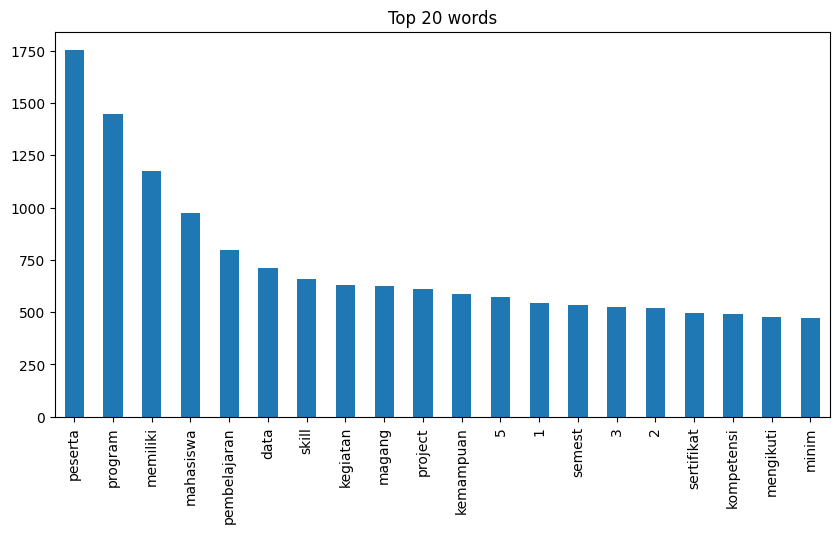

In [40]:
# Word Frequency
import matplotlib.pyplot as plt
word_freq = pd.Series(' '.join(train_df['clean']).split()).value_counts()[:20]
word_freq.plot(kind='bar', figsize=(10, 5), title='Top 20 words')
plt.show()

Number of documents: 500
Vocabulary size: 2262


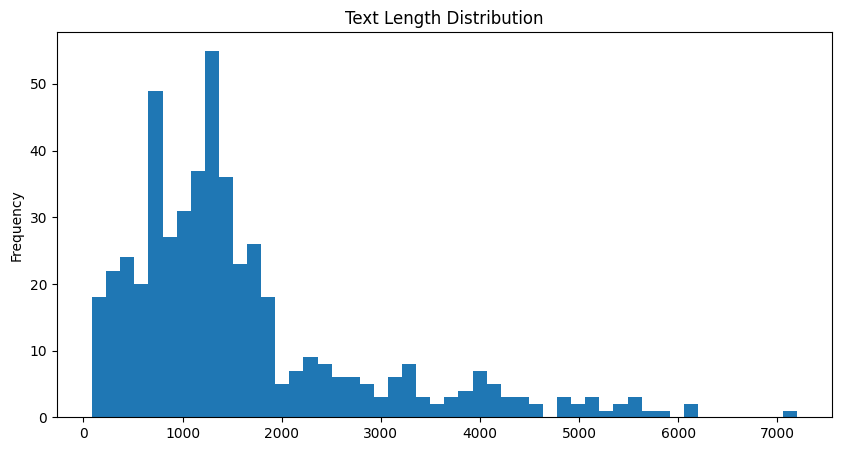

   ID  Kategori Umum         Kategori Khusus Penyelenggara Posisi  \
0   1  Kegiatan Umum  Organisasi Luar Kampus        AIESEC  Staff   
1   2  Kegiatan Umum  Organisasi Luar Kampus        AIESEC  Staff   
2   3  Kegiatan Umum  Organisasi Luar Kampus        AIESEC  Staff   
3   4  Kegiatan Umum  Organisasi Luar Kampus        AIESEC  Staff   
4   5  Kegiatan Umum  Organisasi Luar Kampus        AIESEC  Staff   

                                           Deskripsi   Durasi  \
0  AIESEC, organisasi kepemimpinan pemuda global,...  1 Tahun   
1  AIESEC, organisasi kepemimpinan pemuda global,...  1 Tahun   
2  AIESEC, organisasi kepemimpinan pemuda global,...  1 Tahun   
3  AIESEC, organisasi kepemimpinan pemuda global,...  1 Tahun   
4  AIESEC, organisasi kepemimpinan pemuda global,...  1 Tahun   

  Tanggal Pendaftaran                               Link               CP  \
0  10-26 Agustus 2024  https://aiesec.or.id/join-aiesec/  ‪6281333553871‬   
1  10-26 Agustus 2024  https://aiesec.or

In [41]:
# Basic statistics
print(f"Number of documents: {train_df.shape[0]}")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

# Text Length Distribution
train_df['text_length'] = train_df['clean'].apply(len)
train_df['text_length'].plot(kind='hist', bins=50, figsize=(10, 5), title='Text Length Distribution')
plt.show()

# Example output of processed data
print(train_df.head())

In [42]:
# Initialize vectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)

# Fit and transform the clean text data
train_vectors = vectorizer.fit_transform(train_df['clean'])

# Example output of TF-IDF vectors
print(train_vectors.shape)  # Output the shape of the TF-IDF matrix
print(train_vectors)        # Output the TF-IDF matrix itself

(500, 2262)
  (0, 611)	0.08726047769264758
  (0, 1689)	0.14759864459608804
  (0, 1662)	0.15007920253073218
  (0, 380)	0.19914900149175765
  (0, 259)	0.19914900149175765
  (0, 1093)	0.11950069139413366
  (0, 1187)	0.16023361611070938
  (0, 1531)	0.1541175331188855
  (0, 1045)	0.07232850445780252
  (0, 2127)	0.07022131881538189
  (0, 985)	0.07126092424770375
  (0, 1308)	0.13356762093932956
  (0, 145)	0.12591397430756265
  (0, 1511)	0.13273230579145565
  (0, 1234)	0.1570578413196398
  (0, 95)	0.18455915163889353
  (0, 1966)	0.10735321275110297
  (0, 1016)	0.1541175331188855
  (0, 1752)	0.16368587985354727
  (0, 2102)	0.11776277836164827
  (0, 1509)	0.10205522068113232
  (0, 1050)	0.14200120956502185
  (0, 1950)	0.11334002057925463
  (0, 1430)	0.12661622279963175
  (0, 1501)	0.17888148199197962
  :	:
  (499, 752)	0.11574299663847071
  (499, 1958)	0.05469566343674885
  (499, 922)	0.05502092139106254
  (499, 140)	0.05901306341040732
  (499, 986)	0.07246554282962628
  (499, 465)	0.10465777302

In [43]:
# Define stemming function
ps = PorterStemmer()
def stem(text):
    return " ".join([ps.stem(word) for word in text.split()])

train_df['tags'] = train_df['clean'].apply(stem)
vector = vectorizer.transform(train_df['tags'])

In [44]:
# Recommendation function
def recommend_activities(user_preference, penyelenggara, durasi, user_skills, user_past_activities, top_n=3):
    if user_preference.lower() == 'dalam kampus':
        filtered_df = train_df[train_df['Kategori Umum'] == 'Kegiatan Intra Kampus']
        if penyelenggara:
            filtered_df = filtered_df[filtered_df['Penyelenggara'] == penyelenggara]
    else:
        filtered_df = train_df[train_df['Kategori Umum'] == 'Kegiatan Umum']

    # Filter by duration
    if durasi:
        filtered_df = filtered_df[filtered_df['Durasi'] == durasi]

    if filtered_df.empty:
        return []
        
    user_input = user_skills + " " + user_past_activities
    user_input_vector = vectorizer.transform([user_input])
    filtered_vectors = vectorizer.transform(filtered_df['tags'])
    similarity_scores = cosine_similarity(user_input_vector, filtered_vectors).flatten()
    top_indices = similarity_scores.argsort()[-top_n:][::-1]

    recommendations = []
    for index in top_indices:
        recommendations.append({
            'ID': filtered_df.iloc[index]['ID'],
            'Deskripsi': filtered_df.iloc[index]['Deskripsi'],
            'Durasi':filtered_df.iloc[index]['Durasi'],
            'Similarity Score': similarity_scores[index]
        })
    return recommendations

In [61]:
# Example usage
user_preference = 'luar kampus'
penyelenggara = 'UPN Veteran Jakarta'
durasi = '5 bulan'
user_skills = 'data science'
user_past_activities = 'ketua bem'
recommendations = recommend_activities(user_preference, penyelenggara, durasi, user_skills, user_past_activities)
print(recommendations)

[{'ID': 247, 'Deskripsi': 'Data Engineering Academy\nAktivitas ini meliputi pembelajaran individu dan project akhir dalam bentuk tim. Pada pembelajaran individu, setiap peserta akan mengikuti kelas dalam bentuk online meeting. Peserta dapat berkonsultasi dengan expert terkait materi yang dipelajarinya. Selain itu, setiap peserta akan memiliki pembimbing proyek dan dapat berkonsultasi jika peserta menemui kesulitan non-akademik dalam mengikuti pembelajaran maupun ketika mengerjakan proyek.\nModul Pembelajaran\n- Konsep Data Engineering dan Data Warehouse\n- Pengantar Database untuk Data Engineering\n- Data Eksplorasi\n- Data Integration\n- Big Data\n- Cloud Computing untuk Data Engineering\n- Data Interpretation\n- Final Project\n- Soft Skill\nPersyaratan\nData Engineering Academy\nJurusan: Teknik Informatika, Sistem Informasi, Ilmu Komputer, Teknik Elektro, Matematika, Fisika dan, Statistika.\nJenjang: S1, D3\nSemester: Minimal semester 5 (S1) dan minimal semester 5 (D3)\nSertifikasi\n

In [62]:
# Convert recommendations to table format
from tabulate import tabulate  # Import the tabulate function
table = []
for recommendation in recommendations:
    table.append([recommendation['ID'], recommendation['Deskripsi'], recommendation['Durasi'], recommendation['Similarity Score']])

# Print table
headers = ['ID', 'Deskripsi', 'Durasi', 'Similarity Score']
print(tabulate(table, headers=headers))

  ID  Deskripsi                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Durasi      Similarity Score
----  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------